In [1]:
import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [3]:
import plotly as py
import cufflinks as cf

from plotly.offline import iplot

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
import seaborn as sns
from scipy import stats

In [5]:
train =  pd.read_csv('df_RFE_train.csv')

In [6]:
train1 = pd.read_csv('df_RFE_train.csv')

In [7]:
train

,Unnamed: 0,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,0,-0.407747,0.376314,0.660790,-0.140840,0.892055,0.124660,0.977436,-0.123213,-0.970905,...,-0.983163,-0.991975,-0.999982,-1.000000,-0.257549,-0.948870,-0.998285,-0.990697,0.179941,5
1,1,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,...,-0.973770,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5
2,2,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,...,-0.963072,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
3,3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,...,-0.987275,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5
4,4,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,...,-0.980848,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,7347,0.195643,-0.211822,-0.283335,-0.222004,0.867718,-0.016391,0.920554,-0.234998,-0.918375,...,-0.224135,-0.614001,-0.775736,-1.000000,-0.434780,-0.007392,-0.584282,-0.723951,0.238604,2
7348,7348,0.178138,-0.198555,-0.274504,-0.242054,0.866116,-0.016391,0.920554,-0.234998,-0.902880,...,-0.261767,-0.613520,-0.780751,-0.933333,-0.516570,-0.172448,-0.632536,-0.771183,0.252676,2
7349,7349,0.173131,-0.226826,-0.198452,-0.236950,0.854641,0.024684,0.933008,-0.216004,-0.907561,...,-0.263932,-0.626141,-0.783616,-0.933333,-0.289537,-0.216074,-0.641170,-0.726372,0.249145,2
7350,7350,0.160333,-0.257775,-0.189915,-0.233230,0.855988,0.024684,0.933008,-0.210542,-0.910648,...,-0.262225,-0.542854,-0.821137,-0.933333,-0.362980,-0.220443,-0.663579,-0.689421,0.246432,2


In [8]:
train = train.drop(columns = ['Unnamed: 0'])

In [9]:
##partizione

X_train = train.values
y_train = np.array(train1['label'])

## Visual Approach

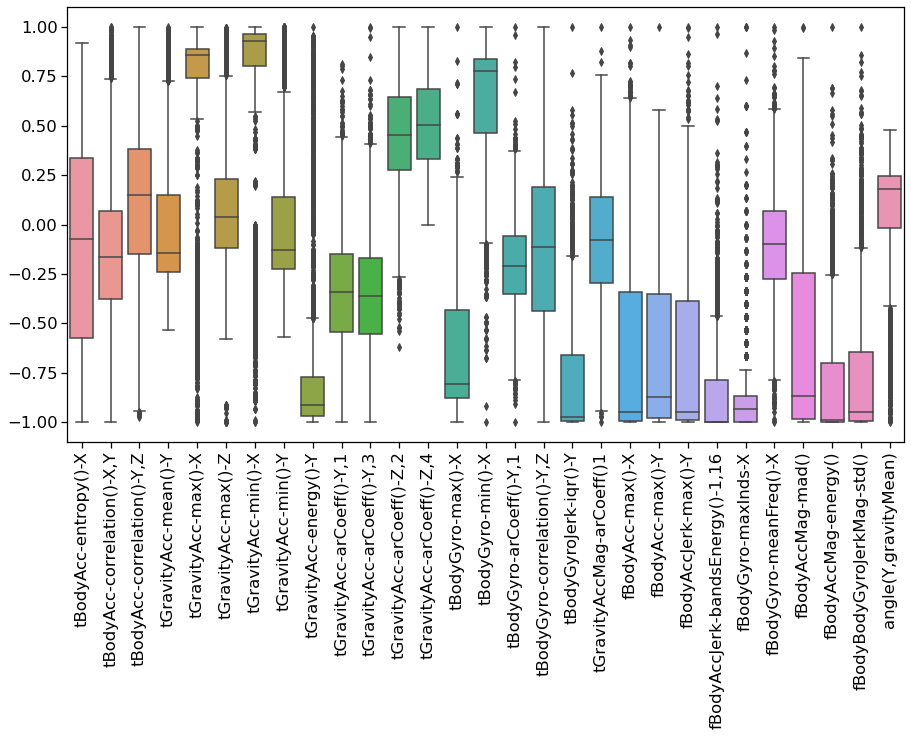

In [9]:
# boxplot
plt.figure(figsize=(15,8))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":5,"axes.titlesize":5,"axes.labelsize":5})
sns.boxplot(data = train)
plt.xticks(rotation=90)
plt.savefig('boxplot_out.png')
plt.show()


## Likelihood Approach

In [10]:
def norm_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))
              
def unif_dist(x, n):
    return 1/n

In [11]:
data = np.array(train['tBodyAcc-entropy()-X'])

In [12]:
M = np.copy(train['tBodyAcc-entropy()-X'])
A = []
lambda_par = 0.3

muM = np.mean(M)
sigmaM = np.std(M)
sizeA = len(A)

sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])

sumA = np.sum([unif_dist(x, sizeA) for x in A])

ll = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [13]:
M = np.copy(train['tBodyAcc-entropy()-X'])
A = []
c = 0.2
for i, x in enumerate(data):
    A.append(x)
    M = np.array([xo for j, xo in enumerate(data) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)
    sizeA = len(A)
    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])
    ll_xi = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = abs(ll - ll_xi)
    print(i, delta_ll, 'outlier' if delta_ll > c else 'inlier')
    M = np.copy(data)
    A = list()

0 0.5636457081495791 outlier
1 0.15467800997112136 inlier
2 0.32462655979679766 outlier
3 0.2756651651229731 outlier
4 0.0587771531108956 inlier
5 0.10467335218072549 inlier
6 0.2621017452779597 outlier
7 0.2675965942780749 outlier
8 0.19832991588691584 inlier
9 0.3817672759664674 outlier
10 0.27350488061620126 outlier
11 0.007164213602209202 inlier
12 0.02169458257048973 inlier
13 0.06865902919207656 inlier
14 0.7483226212993941 outlier
15 0.2749344109965932 outlier
16 0.2503402166012165 outlier
17 0.25524179101785194 outlier
18 0.172572900367868 inlier
19 0.033641774497027654 inlier
20 0.11758276841328552 inlier
21 0.11758276841328552 inlier
22 0.04640318156862122 inlier
23 0.13560352245667673 inlier
24 0.25723846313621834 outlier
25 0.21957545700843184 outlier
26 0.006881687100758427 inlier
27 0.4695960106655548 outlier
28 0.7146570785048425 outlier
29 0.45472329327594707 outlier
30 0.5093798200127821 outlier
31 0.43043369642282414 outlier
32 0.6090977801113695 outlier
33 0.69492889

## isolation forest

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [11]:
random_state = np.random.RandomState(42)

In [12]:
model = IsolationForest(contamination=float(0.02),random_state=random_state)
model.fit(X_train)

IsolationForest(contamination=0.02,
                random_state=RandomState(MT19937) at 0x1CD0C4ECA40)

In [13]:
model.get_params()

{'bootstrap': False,
 'contamination': 0.02,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': RandomState(MT19937) at 0x1CD0C4ECA40,
 'verbose': 0,
 'warm_start': False}

In [15]:
train['anomaly']=model.predict(X_train)

train

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label,anomaly
0,-0.407747,0.376314,0.660790,-0.140840,0.892055,0.124660,0.977436,-0.123213,-0.970905,-0.745449,...,-0.991975,-0.999982,-1.000000,-0.257549,-0.948870,-0.998285,-0.990697,0.179941,5,1
1,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5,1
2,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5,1
3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5,1
4,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.195643,-0.211822,-0.283335,-0.222004,0.867718,-0.016391,0.920554,-0.234998,-0.918375,-0.689028,...,-0.614001,-0.775736,-1.000000,-0.434780,-0.007392,-0.584282,-0.723951,0.238604,2,1
7348,0.178138,-0.198555,-0.274504,-0.242054,0.866116,-0.016391,0.920554,-0.234998,-0.902880,-0.662997,...,-0.613520,-0.780751,-0.933333,-0.516570,-0.172448,-0.632536,-0.771183,0.252676,2,1
7349,0.173131,-0.226826,-0.198452,-0.236950,0.854641,0.024684,0.933008,-0.216004,-0.907561,-0.459707,...,-0.626141,-0.783616,-0.933333,-0.289537,-0.216074,-0.641170,-0.726372,0.249145,2,1
7350,0.160333,-0.257775,-0.189915,-0.233230,0.855988,0.024684,0.933008,-0.210542,-0.910648,-0.418440,...,-0.542854,-0.821137,-0.933333,-0.362980,-0.220443,-0.663579,-0.689421,0.246432,2,1


In [16]:
anomaly=train.loc[train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly_index)

[64, 66, 67, 68, 69, 70, 71, 72, 237, 238, 240, 241, 245, 246, 247, 418, 578, 594, 742, 743, 753, 896, 1049, 1050, 1051, 1062, 1063, 1075, 1076, 1209, 1210, 1211, 1214, 1223, 1224, 1226, 1266, 1267, 1271, 1272, 1273, 1274, 1275, 1276, 1369, 1523, 1667, 1680, 1813, 1826, 1827, 1951, 2111, 2124, 2276, 2412, 2440, 2451, 2505, 2510, 2511, 2512, 2597, 2598, 2610, 2611, 2612, 2613, 2762, 2763, 2779, 2786, 2787, 3149, 3763, 3764, 3891, 3892, 3898, 3928, 3929, 3930, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3953, 3954, 3955, 3957, 3958, 3960, 4057, 4076, 4282, 4435, 4450, 4597, 4617, 4618, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5153, 5154, 5155, 5339, 5346, 5347, 5350, 5351, 5352, 5360, 5361, 5362, 5363, 5365, 5366, 5368, 5369, 5370, 5371, 5557, 5574, 5742, 5761, 6329, 6702, 6865, 6880, 7230, 7247]


In [17]:
len(anomaly_index)

148

### visualize with PCA

In [130]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

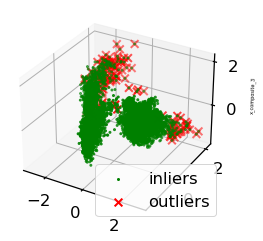

In [131]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
X_reduce = pca.fit_transform(X_train)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[anomaly_index,0],X_reduce[anomaly_index,1], X_reduce[anomaly_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
#plt.figure(figsize=(20,20))
plt.savefig('out_3d.png')
plt.show()

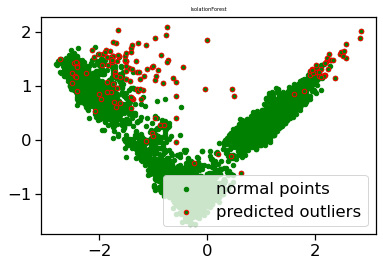

In [132]:
pca = PCA(2)
pca.fit(X_train)
res=pd.DataFrame(pca.transform(X_train))
#Z = np.array(res)
plt.title("IsolationForest")
#plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[anomaly_index,0],res.iloc[anomaly_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc= 'lower right')
plt.show()

In [133]:
X_train

array([[-0.40774707,  0.37631389,  0.66079033, ..., -0.9982852 ,
        -0.99069746,  0.17994061],
       [-0.71489166, -0.01342866,  0.57938169, ..., -0.99947194,
        -0.99639947,  0.18028889],
       [-0.59223514, -0.12469839,  0.60890014, ..., -0.99980673,
        -0.99512739,  0.18063731],
       ...,
       [ 0.17313063, -0.22682586, -0.19845192, ..., -0.64116959,
        -0.72637184,  0.24914484],
       [ 0.16033333, -0.25777522, -0.18991531, ..., -0.66357936,
        -0.6894209 ,  0.24643223],
       [ 0.3121799 , -0.26644248, -0.20029339, ..., -0.69808748,
        -0.74512041,  0.24680852]])

## Extended isolation forest

In [8]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.311-b11, mixed mode)
  Starting server from C:\Users\eleon\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eleon\AppData\Local\Temp\tmphfzk10w7
  JVM stdout: C:\Users\eleon\AppData\Local\Temp\tmphfzk10w7\h2o_eleon_started_from_python.out
  JVM stderr: C:\Users\eleon\AppData\Local\Temp\tmphfzk10w7\h2o_eleon_started_from_python.err


C:\Users\eleon\anaconda3\lib\site-packages\h2o\backend\server.py:386: UserWarning:

  You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.




  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_eleon_u4idyt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,242.6 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [12]:
train2 = h2o.import_file('df_RFE_train.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
train2

C1,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,4",tBodyGyro-max()-X,tBodyGyro-min()-X,"tBodyGyro-arCoeff()-Y,1","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-iqr()-Y,tGravityAccMag-arCoeff()1,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.407747,0.376314,0.66079,-0.14084,0.892055,0.12466,0.977436,-0.123213,-0.970905,-0.745449,-0.712372,0.995675,0.991653,-0.867044,0.847308,1,0.301099,-0.996939,-0.173179,-0.993756,-0.983163,-0.991975,-0.999982,-1,-0.257549,-0.94887,-0.998285,-0.990697,0.179941,5
1,-0.714892,-0.0134287,0.579382,-0.141551,0.89206,0.122586,0.98452,-0.114893,-0.970583,-0.196359,-0.105568,0.834271,0.830464,-0.864904,0.833721,-0.0470318,0.169395,-0.997301,0.0815686,-0.999372,-0.97377,-0.984923,-0.999987,-1,-0.0481674,-0.975777,-0.999472,-0.996399,0.180289,5
2,-0.592235,-0.124698,0.6089,-0.14201,0.892401,0.0945658,0.98677,-0.114893,-0.970368,-0.329023,-0.25449,0.714392,0.728755,-0.864904,0.833721,0.0323116,-0.350646,-0.995428,0.0380491,-0.998158,-0.963072,-0.985351,-0.999963,-1,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.0934247,0.986821,-0.121336,-0.9694,-0.295036,-0.206281,0.386373,0.385263,-0.88532,0.834164,0.0445532,-0.725301,-0.997078,-0.0928559,-0.997404,-0.987275,-0.987874,-0.999978,-1,0.216862,-0.983524,-0.99977,-0.995237,0.181935,5
4,-0.786553,-0.155804,0.599213,-0.14875,0.893817,0.0916824,0.987434,-0.121834,-0.967051,-0.166693,-0.0663267,0.239268,0.240569,-0.870154,0.839091,-0.163221,-0.724558,-0.996718,0.180441,-0.999277,-0.980848,-0.990373,-0.999988,-1,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5
5,-0.751869,-0.209979,0.180424,-0.14821,0.893683,0.0833471,0.987722,-0.121834,-0.967321,-0.198125,-0.107554,0.175375,0.207965,-0.870154,0.839808,-0.119692,-0.745979,-0.996122,0.370339,-0.998598,-0.993414,-0.992801,-0.999987,-0.933333,-0.36304,-0.993851,-0.999939,-0.995239,0.184823,5
6,-0.637185,-0.0958521,0.610845,-0.144282,0.89337,0.0852057,0.987722,-0.120092,-0.969266,-0.42267,-0.362169,0.137692,0.153476,-0.880846,0.839232,-0.0468876,-0.687681,-0.996192,0.15592,-0.996957,-0.968729,-0.991111,-0.999983,-1,-0.307125,-0.98249,-0.999676,-0.994639,0.18217,5
7,-0.633239,-0.161634,0.561421,-0.146705,0.894205,0.0852057,0.987926,-0.128559,-0.968033,-0.470618,-0.405063,0.139173,0.129649,-0.878916,0.839232,-0.0858853,-0.73265,-0.996285,0.0496637,-0.998347,-0.962426,-0.988152,-0.99998,-0.866667,-0.0881359,-0.976829,-0.99947,-0.994507,0.183779,5
8,-0.683117,-0.164791,0.724234,-0.154374,0.894205,0.0844737,0.987754,-0.129764,-0.964123,-0.328687,-0.239881,0.503643,0.496765,-0.878916,0.842403,-0.171022,-0.442481,-0.996964,0.382674,-0.997174,-0.953859,-0.98537,-0.999987,-1,-0.184055,-0.979264,-0.99952,-0.996007,0.188982,5
9,-0.550721,-0.176241,0.391867,-0.156302,0.894778,0.0734882,0.987754,-0.129764,-0.963137,-0.362308,-0.310721,0.484213,0.514929,-0.871571,0.836739,-0.204035,-0.446921,-0.99337,0.430695,-0.996913,-0.984395,-0.975047,-0.999953,-0.533333,-0.172768,-0.987825,-0.999777,-0.990599,0.19031,5


In [15]:
train2.drop(['label'])

C1,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,4",tBodyGyro-max()-X,tBodyGyro-min()-X,"tBodyGyro-arCoeff()-Y,1","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-iqr()-Y,tGravityAccMag-arCoeff()1,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)"
0,-0.407747,0.376314,0.66079,-0.14084,0.892055,0.12466,0.977436,-0.123213,-0.970905,-0.745449,-0.712372,0.995675,0.991653,-0.867044,0.847308,1,0.301099,-0.996939,-0.173179,-0.993756,-0.983163,-0.991975,-0.999982,-1,-0.257549,-0.94887,-0.998285,-0.990697,0.179941
1,-0.714892,-0.0134287,0.579382,-0.141551,0.89206,0.122586,0.98452,-0.114893,-0.970583,-0.196359,-0.105568,0.834271,0.830464,-0.864904,0.833721,-0.0470318,0.169395,-0.997301,0.0815686,-0.999372,-0.97377,-0.984923,-0.999987,-1,-0.0481674,-0.975777,-0.999472,-0.996399,0.180289
2,-0.592235,-0.124698,0.6089,-0.14201,0.892401,0.0945658,0.98677,-0.114893,-0.970368,-0.329023,-0.25449,0.714392,0.728755,-0.864904,0.833721,0.0323116,-0.350646,-0.995428,0.0380491,-0.998158,-0.963072,-0.985351,-0.999963,-1,-0.216685,-0.985594,-0.999807,-0.995127,0.180637
3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.0934247,0.986821,-0.121336,-0.9694,-0.295036,-0.206281,0.386373,0.385263,-0.88532,0.834164,0.0445532,-0.725301,-0.997078,-0.0928559,-0.997404,-0.987275,-0.987874,-0.999978,-1,0.216862,-0.983524,-0.99977,-0.995237,0.181935
4,-0.786553,-0.155804,0.599213,-0.14875,0.893817,0.0916824,0.987434,-0.121834,-0.967051,-0.166693,-0.0663267,0.239268,0.240569,-0.870154,0.839091,-0.163221,-0.724558,-0.996718,0.180441,-0.999277,-0.980848,-0.990373,-0.999988,-1,-0.153343,-0.992324,-0.999873,-0.995465,0.185151
5,-0.751869,-0.209979,0.180424,-0.14821,0.893683,0.0833471,0.987722,-0.121834,-0.967321,-0.198125,-0.107554,0.175375,0.207965,-0.870154,0.839808,-0.119692,-0.745979,-0.996122,0.370339,-0.998598,-0.993414,-0.992801,-0.999987,-0.933333,-0.36304,-0.993851,-0.999939,-0.995239,0.184823
6,-0.637185,-0.0958521,0.610845,-0.144282,0.89337,0.0852057,0.987722,-0.120092,-0.969266,-0.42267,-0.362169,0.137692,0.153476,-0.880846,0.839232,-0.0468876,-0.687681,-0.996192,0.15592,-0.996957,-0.968729,-0.991111,-0.999983,-1,-0.307125,-0.98249,-0.999676,-0.994639,0.18217
7,-0.633239,-0.161634,0.561421,-0.146705,0.894205,0.0852057,0.987926,-0.128559,-0.968033,-0.470618,-0.405063,0.139173,0.129649,-0.878916,0.839232,-0.0858853,-0.73265,-0.996285,0.0496637,-0.998347,-0.962426,-0.988152,-0.99998,-0.866667,-0.0881359,-0.976829,-0.99947,-0.994507,0.183779
8,-0.683117,-0.164791,0.724234,-0.154374,0.894205,0.0844737,0.987754,-0.129764,-0.964123,-0.328687,-0.239881,0.503643,0.496765,-0.878916,0.842403,-0.171022,-0.442481,-0.996964,0.382674,-0.997174,-0.953859,-0.98537,-0.999987,-1,-0.184055,-0.979264,-0.99952,-0.996007,0.188982
9,-0.550721,-0.176241,0.391867,-0.156302,0.894778,0.0734882,0.987754,-0.129764,-0.963137,-0.362308,-0.310721,0.484213,0.514929,-0.871571,0.836739,-0.204035,-0.446921,-0.99337,0.430695,-0.996913,-0.984395,-0.975047,-0.999953,-0.533333,-0.172768,-0.987825,-0.999777,-0.990599,0.19031


In [33]:
eif = H2OExtendedIsolationForestEstimator(ntrees=100,sample_size = 256,
                                          extension_level = 28)

eif.train(training_frame = train2)
eif_result = eif.predict(train2)

extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [34]:
eif_result

anomaly_score,mean_length
0.641739,6.55606
0.639636,6.60457
0.645772,6.46347
0.64021,6.5913
0.643655,6.51198
0.644617,6.48991
0.644181,6.49991
0.635453,6.70154
0.636284,6.68222
0.638656,6.62723


In [35]:
anomaly_score.describe()

Rows:7352
Cols:1




,anomaly_score
type,real
mins,0.46197386687812236
mean,0.5025952551942178
maxs,0.6440048420124921
sigma,0.030278403488630642
zeros,0
missing,0
0,0.6240778134157244
1,0.618639031811012
2,0.6154198843375577
